In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('adult.csv',na_values='?')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# last 5 rows
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Dstaset shape(rows,columns)
df.shape

(32561, 15)

In [5]:
# Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# random sample 50%
df.sample(frac=0.5, random_state=1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9646,24,Private,336088,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K
709,34,Federal-gov,190228,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,48,United-States,>50K
7385,18,Private,104704,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K
16671,44,Private,36271,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
21932,27,Private,178709,Masters,14,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,26,Federal-gov,185885,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Female,0,0,15,United-States,<=50K
27086,20,Private,435469,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,Mexico,<=50K
18816,17,NaN,181337,10th,6,Never-married,NaN,Own-child,Other,Female,0,0,20,United-States,<=50K
12282,34,Local-gov,124827,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [7]:
# drop duplicated rows
print(df.duplicated().any())

True


In [8]:
df.drop_duplicates(inplace = True)
df.shape

(32537, 15)

In [9]:
# fill null values

df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)
df['native.country'].fillna(df['native.country'].mode()[0],inplace = True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.isnull().values.any()

False

In [11]:
# ['HS-grad':9, 'Some-college':10, '7th-8th':4, '10th':6, 'Doctorate':16,
#        'Prof-school':15, 'Bachelors':13, 'Masters':14, '11th':7, 'Assoc-acdm':12,
#        'Assoc-voc':11, '1st-4th':2, '5th-6th':3, '12th':8, '9th':5, 'Preschool':1]

In [12]:
# education & education.num represent same data
df.drop('education',axis=1,inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [13]:
df.rename(columns={'hours.per.week':'hoursPerWeek'},inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hoursPerWeek', 'native.country', 'income'],
      dtype='object')

In [14]:
le = LabelEncoder()
df['income'] = le.fit_transform(df.income)
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hoursPerWeek,native.country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_7628\3125521551.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, fmt=".2f")


<AxesSubplot:>

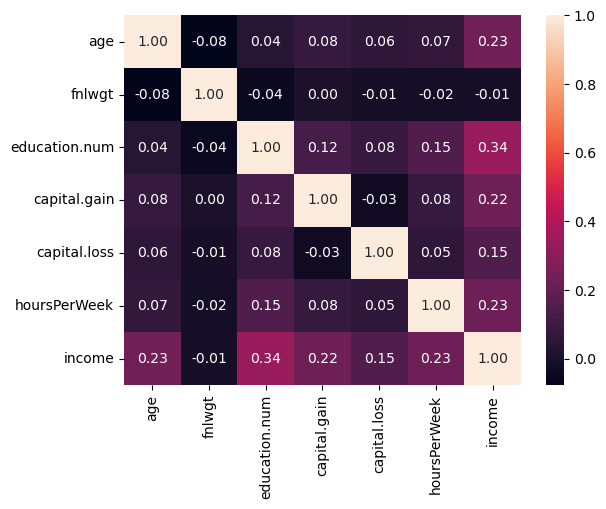

In [15]:
# correlation matrix
sns.heatmap(df.corr(),annot=True, fmt=".2f")

In [16]:
# fnlwgt column not related to income 
df.drop('fnlwgt',axis=1,inplace=True)
df.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hoursPerWeek', 'native.country', 'income'],
      dtype='object')

### Outliers detection

In [17]:
df.describe()

,age,education.num,capital.gain,capital.loss,hoursPerWeek,income
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


Text(0.5, 1.0, 'hours per week')

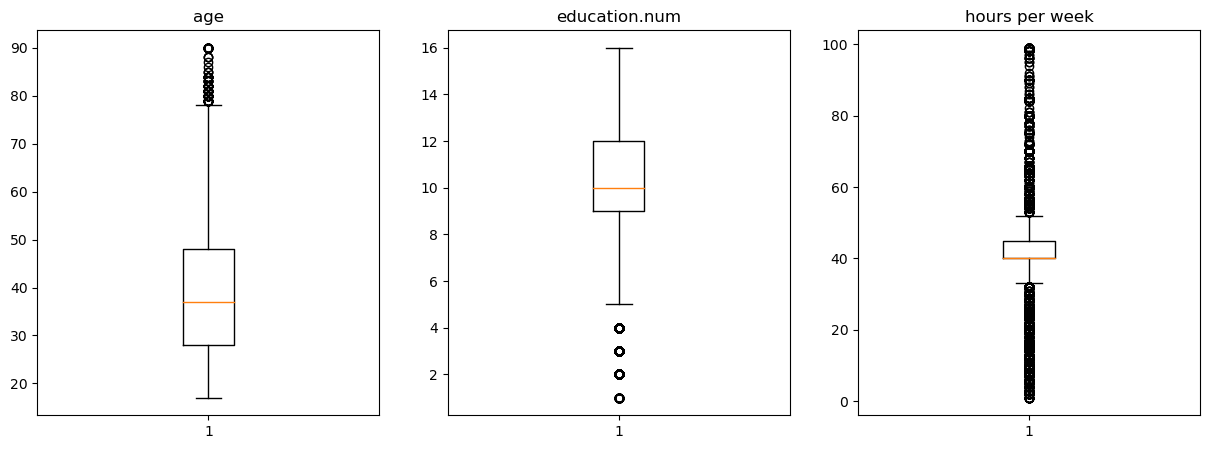

In [18]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].boxplot(df['age'])
ax[0].set_title("age")
ax[1].boxplot(df['education.num'])
ax[1].set_title("education.num")
ax[2].boxplot(df['hoursPerWeek'])
ax[2].set_title("hours per week")

In [19]:
def handle_outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    return lower_limit, upper_limit

In [20]:
l,u=handle_outlier(df['age'])
df.drop(df[(df.age < l) | (df.age > u)].index,inplace=True)

In [21]:
l,u=handle_outlier(df['hoursPerWeek'])
df.drop(df[(df['hoursPerWeek'] < l) | (df['hoursPerWeek'] > u)].index,inplace=True)

Text(0.5, 1.0, 'hoursPerWeek')

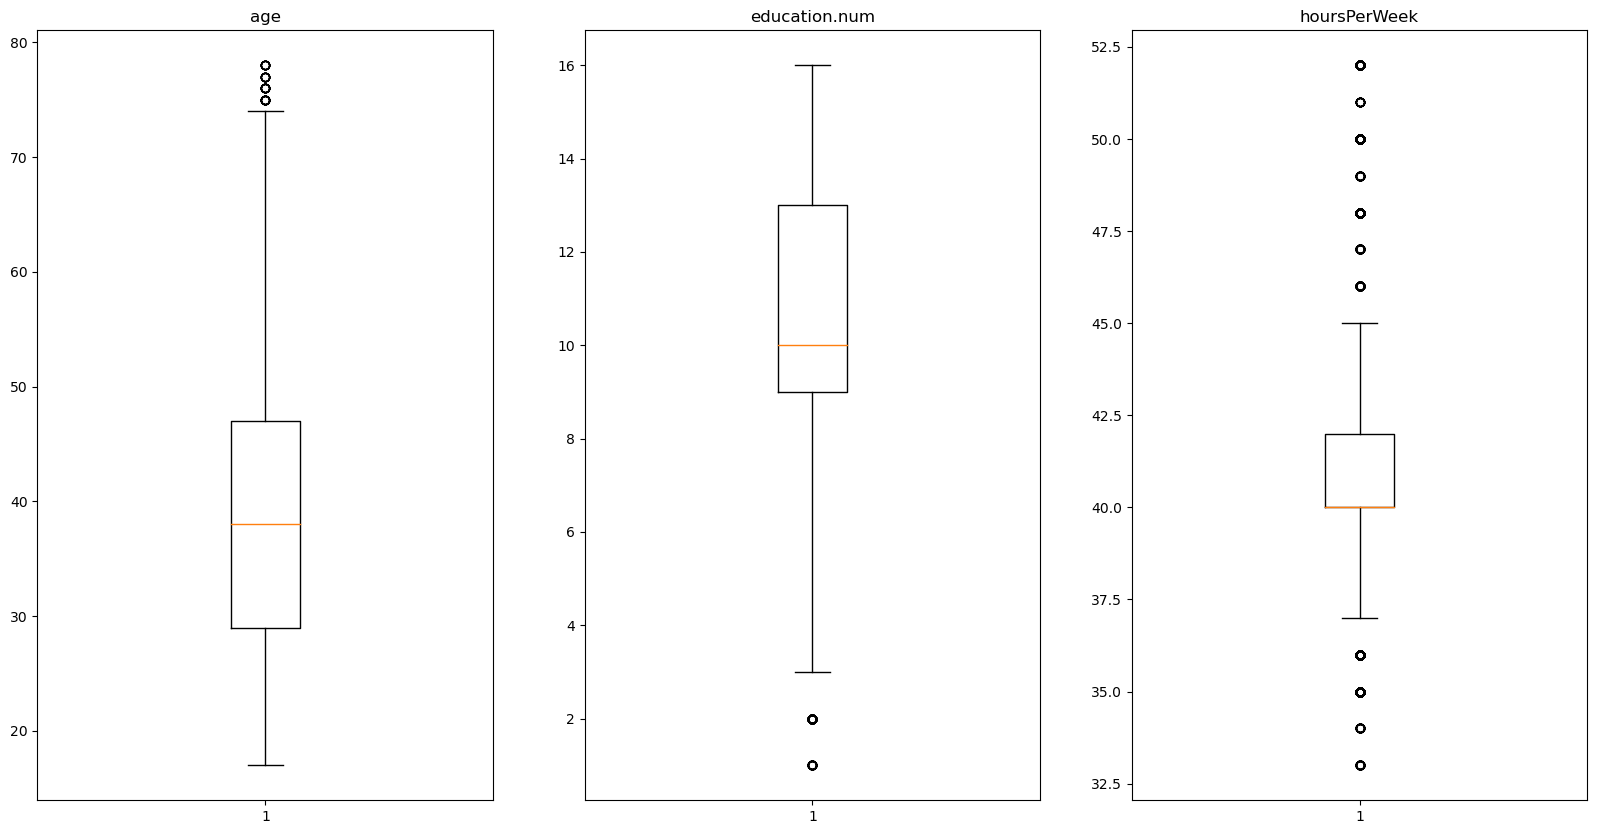

In [22]:
fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].boxplot(df['age'])
ax[0].set_title("age")
ax[1].boxplot(df['education.num'])
ax[1].set_title("education.num")
ax[2].boxplot(df['hoursPerWeek'])
ax[2].set_title("hoursPerWeek")

In [23]:
# categorical data info
df.describe(include=['object'])

,workclass,marital.status,occupation,relationship,race,sex,native.country
count,23482,23482,23482,23482,23482,23482,23482
unique,8,7,14,6,5,2,41
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,17901,11317,3965,10050,19893,16147,21379


In [24]:
# total number of persons having age between(18,48)
df.age.between(17,48).sum()

18185

In [25]:
# workclass which getting the highest salary
df['workclass'][df.hoursPerWeek.max()]

'State-gov'

In [26]:
# The most workclass its income >= 50k
# df.groupby('workclass').income.sum().max()
df['workclass'][df.groupby('workclass').income.sum().max()]

'Private'

In [27]:
# Bachelors:13    Masters:14
# how many persons having Bachelors & Masters degree
print('persons having Bachelors:',len(df[df['education.num'] == 13]))
print('persons having Masters:',len(df[df['education.num'] == 14]))

persons having Bachelors: 4040
persons having Masters: 1261


## Data visualization

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


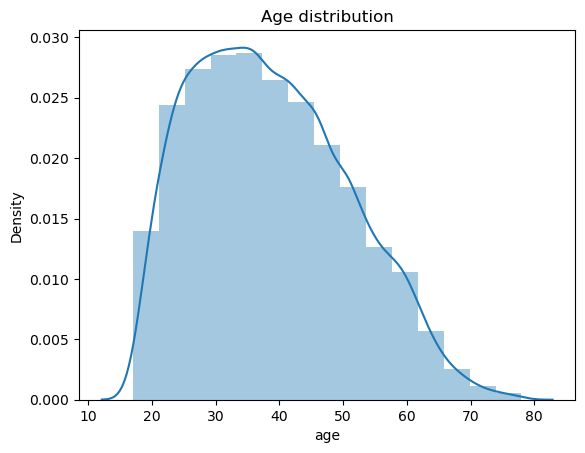

In [28]:
# age distribution
sns.distplot(df.age,bins=15)
plt.title('Age distribution')
plt.show()

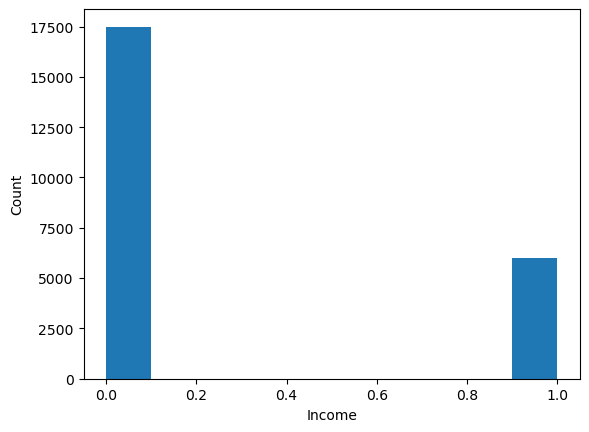

In [29]:
plt.hist(df['income'])
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


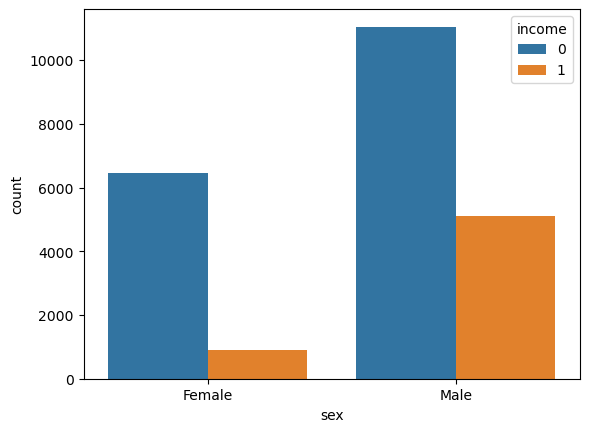

In [30]:
sns.countplot(df.sex, hue = df.income)
plt.show()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


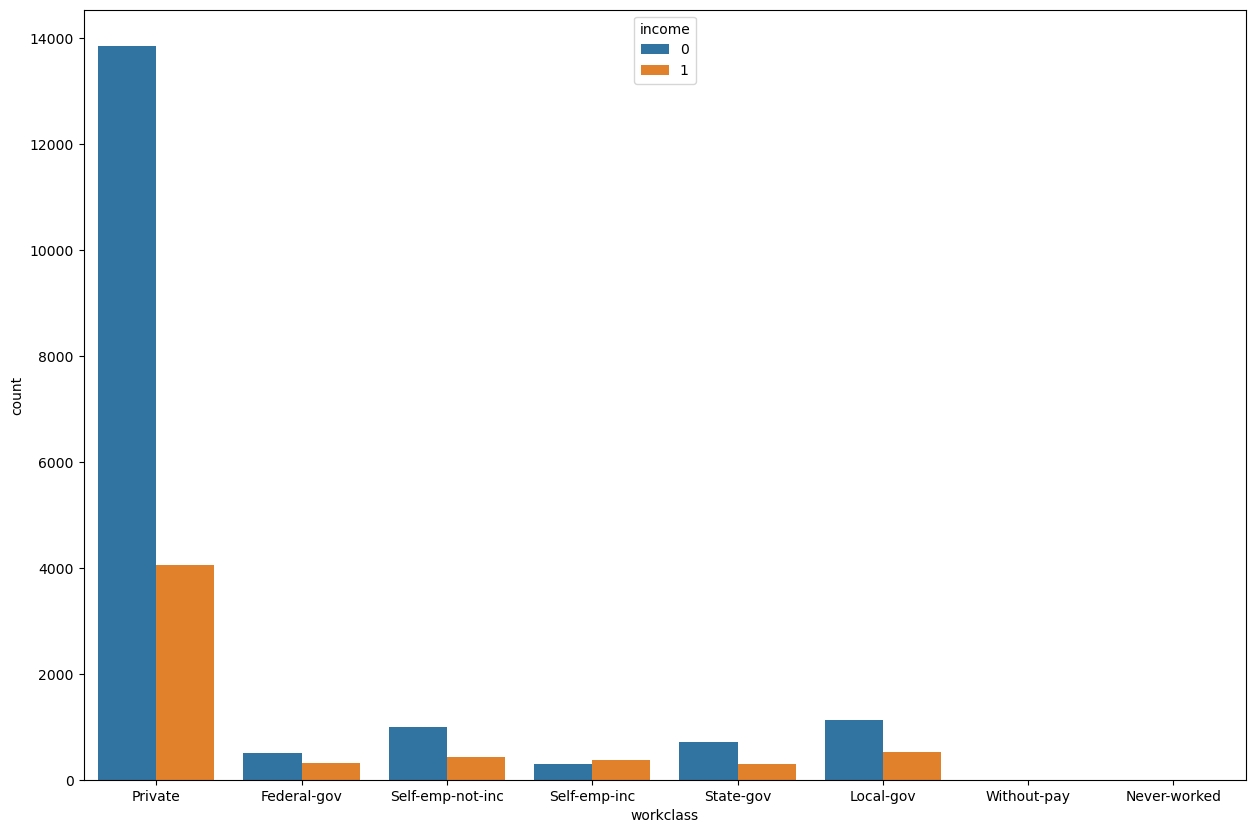

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(df['workclass'], hue = df.income)
plt.show()

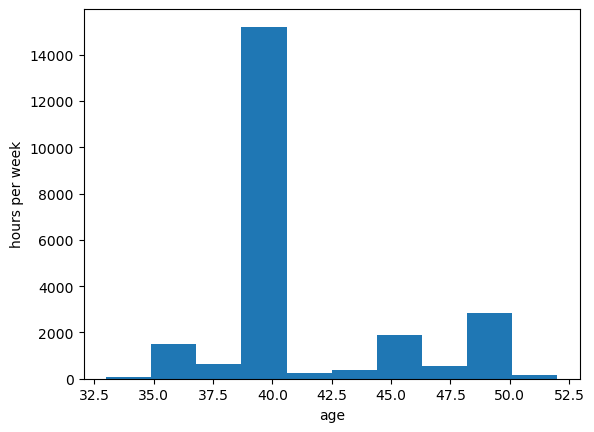

In [32]:
plt.hist(df['hoursPerWeek'])
plt.xlabel("age")
plt.ylabel("hours per week")
plt.show()